
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization
import pylab # used for visualization 
! pip install pingouin
import pingouin as pg # used for conducting statistical analysis and exploring relationships within datasets

df_mh = pd.read_csv('MillerHadenData.csv')



In [2]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())



   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [3]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
participants_with_both_variables = df_mh.dropna(subset=['Abil', 'IQ'])['Participant'].unique()
all_participants = df_mh['Participant'].unique()


Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64


According to the output, there are no missing values (denoted as 0) for each variable: Participant, Abil, IQ, Home, and TV. This means that there is a data point for each participant on all variables in the dataset. Therefore, for each participant, there are measurements available for both Abil and IQ variables.

Text(0, 0.5, 'Frequency')

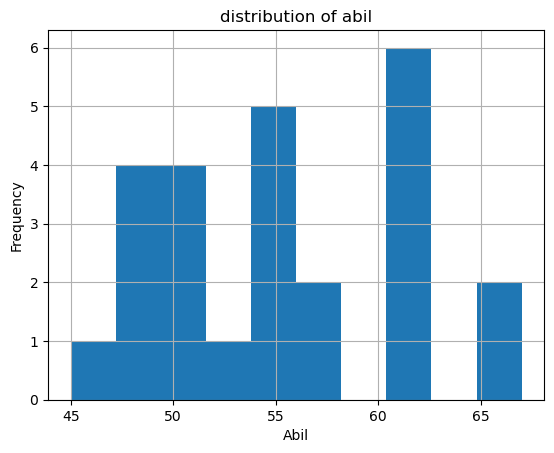

In [5]:
# Q1c (code):
# Check data distribution
#Plotted a histogram of a variable named 'Abil'
df_mh['Abil'].hist()
plt.title('distribution of abil')
plt.xlabel('Abil')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

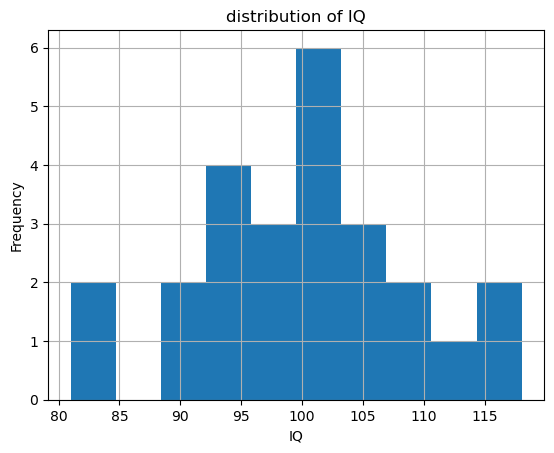

In [6]:
df_mh['IQ'].hist()
plt.title('distribution of IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')

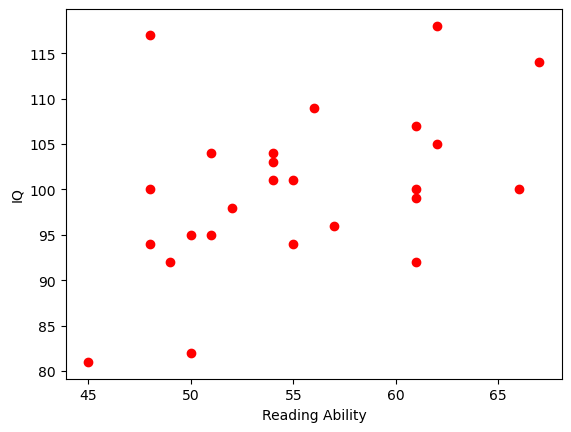

In [10]:
# Q1d (code):
# Scatter plot
Reading_Ability = df_mh['Abil']
IQ = df_mh['IQ']

plt.scatter(Reading_Ability, IQ, c="r")
plt.xlabel("Reading Ability") 
plt.ylabel("IQ")
plt.show()



Observing the scatter plot, it can be noticed that the data points exhibit an approximate linear distribution.

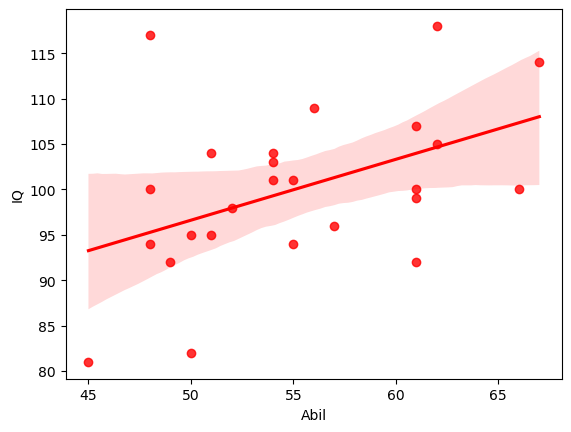

In [12]:
# Q1e (code):
# Correlation line
#Function belonging to the Seaborn library, a library for data visualization.
#Used for drawing a scatter plot between two variables and add a regression line to the plot.
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh)

The degree and direction of the linear link between two variables are indicated by the correlation line, which is created by fitting a straight line between the data points. We can conclude that there is some degree of linear relationship between the two variables because the slope of the two variables is 0.45, which is more than 0.

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

#Q2a (answer with words):
The Pearson correlation coefficient, which indicates the direction and intensity of a linear relationship between two variables, can be used. It is commonly used to analyze correlations between continuous variables and makes the assumption that the relationship between the variables is linear. We can hypothesise that there is a linear correlation between intellect and reading ability given our analytical goal of determining whether there is a relationship between the two. This hypothesis is supported by the scatter plot that displays a linear distribution of data points and the correlation line plot in Question 1, which shows a linear relationship between the two.

In [13]:
# Q2b (code):
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(df_mh['IQ'], df_mh['Abil'])

print(f"Pearson correlation coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.45
P-value: 0.0236


#Q2c (answer with words):
There is a positive linear link between intellect (IQ) and reading ability (Abil), as indicated by the Pearson correlation coefficient of 0.45. According to the null hypothesis, there is an approximately 2.36% chance of seeing a correlation coefficient of this kind or higher, as indicated by the p-value of 0.0236. We can reject the null hypothesis because the p-value is smaller than the significance level, which is usually set at 0.05, indicating that the correlation coefficient is significant. When combined, these findings show a somewhat strong positive linear association between reading ability (Abil) and intellect (IQ).

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
#H0:Reading ability and weekly reading time at home are independent and not related.
#H1:There is a correlation between reading ability and reading time.

In [14]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data processing.
from scipy.stats import chi2_contingency ##used for performing a chi-square test.

# Define the rounded average for Reading Ability and Home
rounded_avg_abil = round(df_mh['Abil'].mean())
rounded_avg_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = 'Low'
df_mh.loc[df_mh['Abil'] > rounded_avg_abil, 'Rank_Abil'] = 'High'

# Create the Rank_Home column
df_mh['Rank_Home'] = 'Infrequent'
df_mh.loc[df_mh['Home'] > rounded_avg_home, 'Rank_Home'] = 'Frequent'
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [17]:
# Q3c (code):
# Construct Contingency Matrix

#Imports the NumPy library and creates an empty list to store elements that will be added to the contingency matrix.
import numpy as np
datacontingency = []

#Calculate the frequency of each combination
#Calculate and add the frequency of the combination with "Rank_Abil" as 'High' and 'Rank_Home' as 'Frequent' to the datacontingency list. 
#And so on.
datacontingency.append(len(df_mh[(df_mh['Rank_Abil'] == 'High') & (df_mh['Rank_Home'] == 'Frequent')]))
datacontingency.append(len(df_mh[(df_mh['Rank_Abil'] == 'Low') & (df_mh['Rank_Home'] == 'Frequent')]))
datacontingency.append(len(df_mh[(df_mh['Rank_Abil'] == 'High') & (df_mh['Rank_Home'] == 'Infrequent')]))
datacontingency.append(len(df_mh[(df_mh['Rank_Abil'] == 'Low') & (df_mh['Rank_Home'] == 'Infrequent')]))

print('The values:')
print(datacontingency)

#Convert the datacontingency list to a NumPy array and use the reshape function to reshape it into a matrix.
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
data_cm = np.array(datacontingency).reshape(2, -1)
print('The contingency matrix')
print(data_cm)



The values:
[8, 3, 2, 12]
The contingency matrix
[[ 8  3]
 [ 2 12]]


In [18]:
# Q3d (code):
# Perform the Chi-square test
#Perform the chi-square test using the chi2_contingency function in the SciPy library.
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")


6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 6.6]
 [5.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


#Q3e (answer in words):
We can throw out the null hypothesis because the p-value is less than 0.05, indicating a significant relationship between reading proficiency and reading time at home.
We can conclude that there is a statistically significant correlation between reading ability and reading time at home based on the findings of the chi-square test.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [19]:

import pandas as pd # used for processing and analysing csv. data.
from scipy import stats # uesd for performing statistical analysis using the functions contained in this module.
import numpy as np # used for numerical operations.
import matplotlib.pyplot as plt ## uesd for charting and visualizing data.
import seaborn as sns # used for statistical data visualization.

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [20]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_dev_age = df_evaluators['age'].std()

print(f"Mean age: {mean_age}")
print(f"Standard Deviation of age: {std_dev_age}")


Mean age: 30.852941176470587
Standard Deviation of age: 6.238358141327351


The mean age of the evaluators is 30.852, and the standard deviation of the age of the evaluators is 6.238

In [21]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = (df_evaluators['sex'] == 1).sum()
female_count = (df_evaluators['sex'] == 2).sum()

print("Number of male evaluators:", male_count)
print("Number of female evaluators:", female_count)


Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [22]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [23]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_df = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]
#“isin” is used to check whether an element of a column in a data frame is in a given list.

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_df.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
# pd.concat is a function of the pandas library, used to connect data frames.
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column.
#pd.merge is a function of the pandas library, used to merge data frames. 
#Based on the 'eval_id' column, the 'ratings2' data frame is merged with the 'df_evaluators' data frame, and the 'condition' column is added to the 'ratings2' data frame.
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



#Q6a (answer in words):
Null hypothesis: There is no significant difference in overall ratings (intellect/hire/impression) between evaluators who listened to pitches and evaluators who read pitches (H0:μ1=μ2).

Alternative hypothesis: There is a significant difference in overall ratings (intellect/hire/impression) between evaluators who listened to pitches and evaluators who read pitches(H1:μ1≠μ2).

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

#Q6b (answer in words):
#Which t-test should we choose, one-tail or two-tail? Explian why.

Two-tail, because the alternative hypothesis are non-directional.In other words, we want to know if there is any difference between the listened group and the read group, regardless of whether the listened group's ratings are higher or lower than the read group's ratings.


#Q6c (answer in words):
#What are the independent variable and the dependent variable here?

Independent variable：method, listening or reading.
Dependent variable：ratings of intellect, hire and impression.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [24]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analysis

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby(['Category', 'condition']).apply(lambda x: shapiro(x['Rating']))

# Test for homogeneity of variances (Levene's test)
levene_results = levene(ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating'],
                        ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating'],
                        ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating'],
                        ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating'],
                        ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating'],
                        ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating'])


#Independent t-tests
ttest_results_intellect = ttest_ind(ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating'],
                                    ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating'])

ttest_results_impression = ttest_ind(ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating'],
                                     ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating'])

ttest_results_hire = ttest_ind(ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating'],
                               ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating'])

ttest_results = (ttest_results_intellect, ttest_results_impression, ttest_results_hire)


ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

#Q7b (answer in words):
Results:
The descriptive statistics provide information about the central tendency (mean), variability (standard deviation), and distribution of ratings for each category (intellect, hire, impression) under each condition (listened, read). For example, in the 'hire' category, the mean rating for evaluators who listened is higher (4.71) compared to those who read (2.89), indicating a potential difference in perceived hireability between the two conditions.
The Shapiro-Wilk test assesses the normality of the distribution of ratings within each category and condition. The test statistic and p-value are provided for each combination of category and condition. A non-significant p-value (typically > 0.05) suggests that the data follows a normal distribution. In this case, all p-values are greater than 0.05, indicating that the assumption of normality is met for all groups.
Levene's test evaluates the homogeneity of variances between groups. The test statistic and p-value are provided. A non-significant p-value (typically > 0.05) suggests that the variances are homogeneous across groups. Here, the p-value is 0.642, indicating that the assumption of homogeneity of variances is met.
Independent t-tests compare the means of two independent groups to determine if there is a statistically significant difference between them. The test statistic (t-value) and p-value are provided for each category. A significant p-value (typically < 0.05) suggests that there is a significant difference between the means of the two groups. In this case, all p-values are less than 0.05, indicating that there are significant differences in ratings between evaluators who listened and those who read, across all categories (intellect, hire, impression).

Explanations:
We use descriptive statistics to summarize the characteristics of the data. Shapiro-Wilk and Levene's tests are used to check assumptions required for t-tests, namely normality and homogeneity of variances, respectively. The independent t-tests are used to determine if there are significant differences in ratings between the two conditions (listened vs. read).
Decisions based on the results: We can conclude that the data meets the assumptions required for t-tests. There are significant differences in ratings between evaluators who listened and those who read, across all categories.